<a href="https://colab.research.google.com/github/rohithdasari1/TB-project/blob/main/saved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tuberculosis Detection from Cough Sounds using Transformers and BiResNet

This project focuses on identifying the likelihood of Tuberculosis (TB) in individuals using only their cough sound recordings. We use audio-based deep learning techniques to classify samples into three categories: healthy, TB suspected, and TB positive.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


The following code snippet checks whether the dataset directory exists or not.

In [ ]:
import os

dataset_dir = "/content/drive/My Drive/nia_sub"

if os.path.exists(dataset_dir):
    print("Dataset found! Listing contents:")
    print(os.listdir(dataset_dir))
else:
    print(f"Directory '{dataset_dir}' does not exist.")


Dataset found! Listing contents:
['test.csv', 'train (1).csv', 'sounds.zip', 'sounds', 'filtered_sounds']


In [ ]:
import zipfile
zip_path = os.path.join(dataset_dir, "sounds.zip")
extract_path = dataset_dir

if not os.path.exists(os.path.join(dataset_dir, "sounds")):  # Check if "sounds" folder exists
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)  # Extract files directly into dataset_dir
    print("Sounds extracted successfully!")
else:
    print("Sounds already extracted.")


Sounds extracted successfully!


In [ ]:
print(os.listdir(dataset_dir))

['test.csv', 'train (1).csv', 'sounds.zip', 'sounds']


If ZIP file found, then extract its content into dataset directory

In [ ]:
import pandas as pd

csv_path = "/content/drive/My Drive/nia_sub/train (1).csv"
df = pd.read_csv(csv_path)

df["coldPresent"].fillna(df["coldPresent"].median(), inplace=True)  # Filling missing values with median
df.isnull().sum()


candidate_ids = df["candidateID"].values  # Store candidate IDs separately
X = df.drop(columns=["disease"]).values  # Features (keep candidateID)
y = df["disease"].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, candidate_ids, test_size=0.2, random_state=42
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


<ipython-input-5-5f9aea7a187b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["coldPresent"].fillna(df["coldPresent"].median(), inplace=True)  # Filling missing values with median


Training Set Shape: (436, 10)
Testing Set Shape: (110, 10)


In [ ]:
import os

sounds_dir = "/content/drive/My Drive/nia_sub/sounds"

# List audio files inside sounds/
audio_files = os.listdir(sounds_dir)
print(f"Total Audio Files: {len(audio_files)}")
print("First 10 files:", audio_files[:10])


Total Audio Files: 881
First 10 files: ['004db89f19f9b.wav', '007238490a3f1.wav', '00ad476fba37b.wav', '00bcbaeb22f5f.wav', '00cd3641085bc.wav', '00da61a101bf6.wav', '01210e1ba43a5.wav', '01496075be747.wav', '01a6c5c6f88a1.wav', '01abb8c563412.wav']


In [ ]:
import os

sounds_dir = "/content/drive/My Drive/nia_sub/sounds"

print("Listing contents of sounds/:")
print(os.listdir(sounds_dir))  # Check if there's another folder inside


Listing contents of sounds/:
['004db89f19f9b.wav', '007238490a3f1.wav', '00ad476fba37b.wav', '00bcbaeb22f5f.wav', '00cd3641085bc.wav', '00da61a101bf6.wav', '01210e1ba43a5.wav', '01496075be747.wav', '01a6c5c6f88a1.wav', '01abb8c563412.wav', '01c80e004b94f.wav', '01e409528626d.wav', '01f75af556134.wav', '021b9b6b69a3d.wav', '0288aa17bd2e1.wav', '02f3f5b46d467.wav', '0343c366074ec.wav', '0363cb845f0db.wav', '03a868c93a9f8.wav', '04921b75c84a4.wav', '0632e0e054c1d.wav', '069276510f6f.wav', '0739fc4b29e33.wav', '076d885796a56.wav', '07f7679bdbf43.wav', '08aac13482ff8.wav', '08f06e8db347d.wav', '08f8a2225f855.wav', '091d713d7c644.wav', '0a6908bb417fa.wav', '0aadce44753ad.wav', '0b4e2a5c5c9fa.wav', '0bc5712e1c031.wav', '0c2672f43b37.wav', '0c69eaa02581b.wav', '0cad7133255dc.wav', '0ddccc465a7bc.wav', '0e114675ba0eb.wav', '0f1d714ae691c.wav', '0fc540acb6bb6.wav', '102efeabb10a5.wav', '1077149142ede.wav', '1116d5aa61957.wav', '11b5fce83d94c.wav', '11c1f0338fbf8.wav', '12ddf107f910c.wav', '13149

In [ ]:
# corupted file
import os

file_name = "39eb38e9c1714.wav"
file_path = os.path.join(sounds_dir, file_name)

if os.path.isfile(file_path):
    print(" File exists in the sounds folder.")
else:
    print(" File not found in the sounds folder.")


 File not found in the sounds folder.


In [ ]:
import numpy as np

candidate_ids = df["candidateID"].values  # Store candidate IDs separately
X = df.drop(columns=["disease"]).values  # Features (keep candidateID)
y = df["disease"].values  # Labels (0 = No TB, 1 = TB positive)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, candidate_ids, test_size=0.2, random_state=42
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (436, 10)
Testing Set Shape: (110, 10)


In [ ]:
import os

sounds_folder = "/content/drive/My Drive/nia_sub/sounds/"

# Check if directory exists
if os.path.exists(sounds_folder):
    print("Directory exists.")
    audio_files = [f for f in os.listdir(sounds_folder) if f.endswith('.wav')]

    if audio_files:
        print(f"Total .wav files found: {len(audio_files)}")
        print("First 10 files:", audio_files[:10])  # Show first 10 files
    else:
        print("No .wav files found in the directory.")
else:
    print("Directory does not exist. Check the path.")


Directory exists.
No .wav files found in the directory.


In [ ]:
import os

sounds_folder = "/content/drive/My Drive/nia_sub/sounds/"

if os.path.exists(sounds_folder):
    print("Directory exists.")
    audio_files = os.listdir(sounds_folder)

    if audio_files:
        print(f"Total files: {len(audio_files)}")
        print("First 10 files:", audio_files[:10])
    else:
        print("No files found after extraction.")
else:
    print("Directory does not exist.")


Directory exists.
Total files: 881
First 10 files: ['004db89f19f9b.wav', '007238490a3f1.wav', '00ad476fba37b.wav', '00bcbaeb22f5f.wav', '00cd3641085bc.wav', '00da61a101bf6.wav', '01210e1ba43a5.wav', '01496075be747.wav', '01a6c5c6f88a1.wav', '01abb8c563412.wav']


In [ ]:
for filename in audio_files:
    old_path = os.path.join(sounds_folder, filename)
    new_path = os.path.join(sounds_folder, filename + ".wav")
    os.rename(old_path, new_path)

print("All files renamed with .wav extension.")


All files renamed with .wav extension.


In [ ]:
os.listdir(sounds_folder)

['004db89f19f9b.wav',
 '007238490a3f1.wav',
 '00ad476fba37b.wav',
 '00bcbaeb22f5f.wav',
 '00cd3641085bc.wav',
 '00da61a101bf6.wav',
 '01210e1ba43a5.wav',
 '01496075be747.wav',
 '01a6c5c6f88a1.wav',
 '01abb8c563412.wav',
 '01c80e004b94f.wav',
 '01e409528626d.wav',
 '01f75af556134.wav',
 '021b9b6b69a3d.wav',
 '0288aa17bd2e1.wav',
 '02f3f5b46d467.wav',
 '0343c366074ec.wav',
 '0363cb845f0db.wav',
 '03a868c93a9f8.wav',
 '04921b75c84a4.wav',
 '0632e0e054c1d.wav',
 '069276510f6f.wav',
 '0739fc4b29e33.wav',
 '076d885796a56.wav',
 '07f7679bdbf43.wav',
 '08aac13482ff8.wav',
 '08f06e8db347d.wav',
 '08f8a2225f855.wav',
 '091d713d7c644.wav',
 '0a6908bb417fa.wav',
 '0aadce44753ad.wav',
 '0b4e2a5c5c9fa.wav',
 '0bc5712e1c031.wav',
 '0c2672f43b37.wav',
 '0c69eaa02581b.wav',
 '0cad7133255dc.wav',
 '0ddccc465a7bc.wav',
 '0e114675ba0eb.wav',
 '0f1d714ae691c.wav',
 '0fc540acb6bb6.wav',
 '102efeabb10a5.wav',
 '1077149142ede.wav',
 '1116d5aa61957.wav',
 '11b5fce83d94c.wav',
 '11c1f0338fbf8.wav',
 '12ddf107f9

In [ ]:
import shutil
import os

corrupt_path = "/content/drive/My Drive/nia_sub/sounds/3304d4d4d088f.wav"

# Check if it's a file or directory
if os.path.exists(corrupt_path):
    if os.path.isdir(corrupt_path):
        shutil.rmtree(corrupt_path)  # Remove directory
        print("Corrupt directory removed successfully.")
    else:
        os.remove(corrupt_path)  # Remove file
        print("Corrupt file removed successfully.")
else:
    print("File or directory not found. It may have already been deleted.")


Corrupt directory removed successfully.


In [ ]:
import os
import shutil

# Paths
sounds_folder = "/content/drive/My Drive/nia_sub/sounds/"
filtered_folder = "/content/drive/My Drive/nia_sub/filtered_sounds/"

# Step 1: Create filtered_sounds directory first
os.makedirs(filtered_folder, exist_ok=True)
print(f"'filtered_sounds' folder created at: {filtered_folder}")

# Step 2: Loop through participant folders and copy cough.wav
for participant_id in os.listdir(sounds_folder):
    participant_path = os.path.join(sounds_folder, participant_id)

    if os.path.isdir(participant_path):  # Ensure it's a folder
        cough_file = os.path.join(participant_path, "cough.wav")

        if os.path.exists(cough_file):  # Check if cough.wav exists
            shutil.copy(cough_file, os.path.join(filtered_folder, f"{participant_id}.wav"))
        else:
            print(f"Warning: cough.wav not found in {participant_id}")

print("Filtered cough.wav files saved in:", filtered_folder)


'filtered_sounds' folder created at: /content/drive/My Drive/nia_sub/filtered_sounds/
Filtered cough.wav files saved in: /content/drive/My Drive/nia_sub/filtered_sounds/


In [ ]:
import os

filtered_sounds_folder = "/content/drive/My Drive/nia_sub/filtered_sounds/"
filtered_files = os.listdir(filtered_sounds_folder)

print("Files in filtered_sounds folder:")
print(filtered_files)


Files in filtered_sounds folder:
['004db89f19f9b.wav', '007238490a3f1.wav', '00ad476fba37b.wav', '00bcbaeb22f5f.wav', '00cd3641085bc.wav', '00da61a101bf6.wav', '01210e1ba43a5.wav', '01496075be747.wav', '01a6c5c6f88a1.wav', '01abb8c563412.wav', '01c80e004b94f.wav', '01e409528626d.wav', '01f75af556134.wav', '021b9b6b69a3d.wav', '0288aa17bd2e1.wav', '02f3f5b46d467.wav', '0343c366074ec.wav', '0363cb845f0db.wav', '03a868c93a9f8.wav', '04921b75c84a4.wav', '0632e0e054c1d.wav', '069276510f6f.wav', '0739fc4b29e33.wav', '076d885796a56.wav', '07f7679bdbf43.wav', '08aac13482ff8.wav', '08f06e8db347d.wav', '08f8a2225f855.wav', '091d713d7c644.wav', '0a6908bb417fa.wav', '0aadce44753ad.wav', '0b4e2a5c5c9fa.wav', '0bc5712e1c031.wav', '0c2672f43b37.wav', '0c69eaa02581b.wav', '0cad7133255dc.wav', '0ddccc465a7bc.wav', '0e114675ba0eb.wav', '0f1d714ae691c.wav', '0fc540acb6bb6.wav', '102efeabb10a5.wav', '1077149142ede.wav', '1116d5aa61957.wav', '11b5fce83d94c.wav', '11c1f0338fbf8.wav', '12ddf107f910c.wav', '1

In [ ]:
import os

folder_path = filtered_sounds_folder

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.wav.wav'):
        # Create the new filename by removing the extra ".wav"
        new_filename = filename.replace('.wav.wav', '.wav')
        old_file = os.path.join(folder_path, filename)
        new_file = os.path.join(folder_path, new_filename)

        # Rename the file
        os.rename(old_file, new_file)
        print(f"Renamed: {filename} -> {new_filename}")


Renamed: 004db89f19f9b.wav.wav -> 004db89f19f9b.wav
Renamed: 007238490a3f1.wav.wav -> 007238490a3f1.wav
Renamed: 00ad476fba37b.wav.wav -> 00ad476fba37b.wav
Renamed: 00bcbaeb22f5f.wav.wav -> 00bcbaeb22f5f.wav
Renamed: 00cd3641085bc.wav.wav -> 00cd3641085bc.wav
Renamed: 00da61a101bf6.wav.wav -> 00da61a101bf6.wav
Renamed: 01210e1ba43a5.wav.wav -> 01210e1ba43a5.wav
Renamed: 01496075be747.wav.wav -> 01496075be747.wav
Renamed: 01a6c5c6f88a1.wav.wav -> 01a6c5c6f88a1.wav
Renamed: 01abb8c563412.wav.wav -> 01abb8c563412.wav
Renamed: 01c80e004b94f.wav.wav -> 01c80e004b94f.wav
Renamed: 01e409528626d.wav.wav -> 01e409528626d.wav
Renamed: 01f75af556134.wav.wav -> 01f75af556134.wav
Renamed: 021b9b6b69a3d.wav.wav -> 021b9b6b69a3d.wav
Renamed: 0288aa17bd2e1.wav.wav -> 0288aa17bd2e1.wav
Renamed: 02f3f5b46d467.wav.wav -> 02f3f5b46d467.wav
Renamed: 0343c366074ec.wav.wav -> 0343c366074ec.wav
Renamed: 0363cb845f0db.wav.wav -> 0363cb845f0db.wav
Renamed: 03a868c93a9f8.wav.wav -> 03a868c93a9f8.wav
Renamed: 049

In [ ]:
import os
import librosa
import numpy as np

filtered_sounds_folder = "/content/drive/My Drive/nia_sub/filtered_sounds/"

def extract_audio_features(candidate_ids):
    features = []
    valid_ids = []  # To store IDs with valid files

    for candidate_id in candidate_ids:
        audio_path = os.path.join(filtered_sounds_folder, f"{candidate_id}.wav")  # Path to filtered files

        if os.path.exists(audio_path):  # Ensure file exists
            y, sr = librosa.load(audio_path, sr=22050)  # Load audio
            if len(y) > 0:
                mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
                mfccs_mean = np.mean(mfccs, axis=1)
                features.append(mfccs_mean)
                valid_ids.append(candidate_id)
            else:
                print(f"Warning: Empty audio file for {candidate_id}")
        else:
            print(f"Warning: Audio file not found for {candidate_id}")

    return np.array(features), valid_ids

# Extract features
X_train_audio, id_train_valid = extract_audio_features(id_train)
X_test_audio, id_test_valid = extract_audio_features(id_test)

print("Train Audio Features Shape:", X_train_audio.shape)
print("Test Audio Features Shape:", X_test_audio.shape)


Train Audio Features Shape: (434, 13)
Test Audio Features Shape: (110, 13)


In [ ]:
problem_files = ["3304d4d4d088f", "5ee582f2832c2"]
with open("skipped_files.txt", "w") as f:
    for item in problem_files:
        f.write(f"{item}\n")

In [ ]:
print("First training sample:", X_train_audio[0] if len(X_train_audio) > 0 else "No data extracted.")
print("Number of valid training samples:", len(id_train_valid))


First training sample: [-300.44547     39.3705     -37.014313    31.787477   -52.470783
    2.3615153  -34.31881    -18.552053   -19.61631     -7.1800423
   -1.1401448   -9.838223     7.0899186]
Number of valid training samples: 545


In [ ]:
import pandas as pd
import os


train_csv_path = "/content/drive/My Drive/nia_sub/train (1).csv"
test_csv_path = "/content/drive/My Drive/nia_sub/test.csv"
filtered_sounds_path = "/content/drive/My Drive/nia_sub/filtered_sounds/"


train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)


y_train = train_df[['candidateID', 'disease']].set_index('candidateID')


available_audio_ids = {f[:-4] for f in os.listdir(filtered_sounds_path) if f.endswith('.wav')}


y_train = y_train.loc[y_train.index.isin(available_audio_ids)]

y_test = [cid for cid in test_df['candidateID'] if cid in available_audio_ids]

print("Filtered y_train shape:", y_train.shape)
print("Sample y_train:\n", y_train.head())
print("Total test candidates with audio:", len(y_test))
print("Sample test IDs:", y_test[:5])


Filtered y_train shape: (545, 1)
Sample y_train:
                disease
candidateID           
b87ea0dd760fa        1
b734834dec6d1        1
e000a41725f53        2
253ba780a0398        0
6663cd023ff3d        1
Total test candidates with audio: 338
Sample test IDs: ['136bac9a3e081', 'b121e45942a46', '6b6853c07e4fb', '71de185eac888', '25deed742f133']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the extracted MFCC features
scaler = StandardScaler()
X_train_audio_norm = scaler.fit_transform(X_train_audio)  # Fit & transform on train set
X_test_audio_norm = scaler.transform(X_test_audio)  # Transform test set

print("Normalized Train Features Shape:", X_train_audio_norm.shape)
print("Normalized Test Features Shape:", X_test_audio_norm.shape)


Normalized Train Features Shape: (434, 13)
Normalized Test Features Shape: (110, 13)


In [ ]:
y_train=train_df[["candidateID",'disease']]
y_train.set_index('candidateID', inplace=True)  # Set candidateID as index
print(y_train.head())

               disease
candidateID           
b87ea0dd760fa        1
b734834dec6d1        1
e000a41725f53        2
253ba780a0398        0
6663cd023ff3d        1


In [ ]:
y_test = test_df['candidateID'].tolist()
print(y_test)

['136bac9a3e081', 'b121e45942a46', '6b6853c07e4fb', '71de185eac888', '25deed742f133', '1de4591779d31', '102efeabb10a5', '522d1f8600a13', 'e41530046a74e', '6337b96a160eb', '911b03c5b0338', '2a86de00c05a2', '3e2f9812d1556', '6e945f019a0c1', '6e25034e1a6a', '96d56f7f06909', 'a8e8d3ae3142c', '07f7679bdbf43', '8d8a02d73b64e', '7bf12460d5552', 'fc665af2e7302', '392901c4cf94b', 'da8930f04479d', 'a9e8e45aefa1e', '5dcbb16c9a5bf', '34fb4b7e44c9d', '2068f4175f7da', 'ab3116a1e19a3', 'cac9a40b86c7a', 'd14c1cd680dff', 'a1c7910996a79', 'a30b7c226f18b', '9122185184c2b', '04921b75c84a4', '8986a4dee4073', 'e12424e0277ad', '00cd3641085bc', 'f9a04c995cacf', 'cb0effe975dcd', 'c8577f8ddc601', 'cb0d19d40ab97', '32a75dca0822f', '2a5af85506203', '228a5e6af42af', '295b45ac72145', '80fb233c125ab', '8a245d02f0499', 'dff06ce4bd439', '18229e2cf30b1', 'a36d117e5763e', '8242581189204', '9273f9fea2816', 'c053972bb64db', '6ead9f1be3022', '800ce7f49b8c4', '2d6d45b4e2e0e', 'cac26b4404b98', 'e53dd487c2d53', '7f96aa04fc609

In [ ]:
train_csv_path = "/content/drive/My Drive/nia_sub/train (1).csv"
test_csv_path = "/content/drive/My Drive/nia_sub/test.csv"
filtered_sounds_path = "/content/drive/My Drive/nia_sub/filtered_sounds/"

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)
y_train = train_df[['candidateID', 'disease']].set_index('candidateID')

available_audio_ids={f[:-4] for f in os.listdir(filtered_sounds_path) if f.endswith(".wav")}
y_train = y_train.loc[y_train.index.isin(available_audio_ids)]


y_test = [cid for cid in test_df['candidateID'] if cid in available_audio_ids]


In [ ]:
pip install pydub

Audio Preprocessing
Audio features were extracted using the **Librosa** library:
- Cough samples were converted into **Mel spectrograms**
- Audio signals were normalized and segmented for consistency
- These spectrograms were used as inputs to the model


In [ ]:
import os
import librosa
import numpy as np
import soundfile as sf
from pydub import AudioSegment

def extract_audio_features(candidate_ids, sounds_folder):
    features = []
    valid_ids = []

    for candidate_id in candidate_ids:
        audio_path = os.path.join(sounds_folder, f"{candidate_id}.wav")

        # Check if file exists
        if not os.path.exists(audio_path):
            print(f"Skipping {candidate_id}: File not found")
            continue

        try:
            # Validate the audio file format
            with sf.SoundFile(audio_path) as f:
                if f.format != "WAV":
                    print(f"Converting {candidate_id} to WAV format...")
                    audio = AudioSegment.from_file(audio_path)
                    audio.export(audio_path, format="wav")

            # Load the audio
            y, sr = librosa.load(audio_path, sr=22050)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            mfccs_mean = np.mean(mfccs, axis=1)

            features.append(mfccs_mean)
            valid_ids.append(candidate_id)

        except Exception as e:
            print(f"Skipping {candidate_id}: {e}")

    return np.array(features), valid_ids


X_train_audio, id_train_valid = extract_audio_features(y_train.index, filtered_sounds_path)
X_test_audio, id_test_valid = extract_audio_features(y_test, filtered_sounds_path)


y_train_filtered = y_train.loc[id_train_valid]


print("Final Train Features Shape:", X_train_audio.shape)
print("Final Test Features Shape:", X_test_audio.shape)
print("Filtered y_train Shape:", y_train_filtered.shape)

y_train_final = y_train_filtered.values.ravel()
print("Final y_train Shape:", y_train_final.shape)

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


Final Train Features Shape: (545, 13)
Final Test Features Shape: (338, 13)
Filtered y_train Shape: (549, 1)
Final y_train Shape: (549,)


In [ ]:
y_train_filtered = y_train.loc[id_train_valid]
print("Final Train Features Shape:", X_train_audio.shape)
print("Final Test Features Shape:", X_test_audio.shape)
print("Filtered y_train Shape:", y_train_filtered.shape)
print("Final y_train Shape:", y_train_final.shape)

Final Train Features Shape: (545, 13)
Final Test Features Shape: (338, 13)
Filtered y_train Shape: (549, 1)
Final y_train Shape: (549,)


In [ ]:
print("Final Train Features Shape:", X_train_audio.shape)
print("Final y_train Shape:", y_train_final.shape)


Final Train Features Shape: (545, 13)
Final y_train Shape: (549,)


In [ ]:
import os
import librosa

def check_audio_files(directory):
    corrupted_files = []

    for file in os.listdir(directory):
        if file.endswith('.wav'):
            file_path = os.path.join(directory, file)
            try:
                y, sr = librosa.load(file_path, sr=22050)
            except Exception as e:
                print(f"Corrupted file: {file} | Error: {e}")
                corrupted_files.append(file)

    return corrupted_files

audio_directory = "/content/drive/My Drive/nia_sub/filtered_sounds/"
corrupt_files = check_audio_files(audio_directory)

print("\nTotal Corrupt Files:", len(corrupt_files))
print("List of Corrupt Files:", corrupt_files)



Total Corrupt Files: 0
List of Corrupt Files: []


In [ ]:

y_train_filtered =y_train[y_train.index.isin(id_train_valid)]
# Check shape consistency
print("X_train_audio Shape:", X_train_audio.shape)  # Should match y_train_filtered
print("y_train_filtered Shape:", y_train_filtered.shape)

y_train_final = y_train_filtered.values.ravel()
print("Final y_train Shape:", y_train_final.shape)


X_train_audio Shape: (545, 13)
y_train_filtered Shape: (545, 1)
Final y_train Shape: (545,)


In [ ]:

y_train_filtered = y_train.loc[y_train.index.isin(id_train_valid)]

y_train_filtered = y_train_filtered.reset_index(drop=True)

y_train_final = y_train_filtered.values.reshape(-1)  # Explicitly reshape to a 1D array

print("Final Train Features Shape:", X_train_audio.shape)
print("Filtered y_train Shape:", y_train_filtered.shape)
print("Final y_train final Shape:", y_train_final.shape)


Final Train Features Shape: (545, 13)
Filtered y_train Shape: (545, 1)
Final y_train final Shape: (545,)


In [ ]:
print(len(id_train_valid))
print(y_train_filtered.shape[0])
print(len(y_train_filtered))

545
545
545


In [ ]:
X_train_audio.shape

(545, 13)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

# Convert labels to categorical (one-hot encoding)
y_train_final_categorical = to_categorical(y_train_final, num_classes=3)

# Define ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_audio.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Healthy (0), Asthma (1), TB (2)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


epochs = 45
batch_size = 16
history = model.fit(
    X_train_audio, y_train_final_categorical,
    epochs=epochs, batch_size=batch_size,
    validation_split=0.2, verbose=1
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4095 - loss: 26.4222 - val_accuracy: 0.1927 - val_loss: 9.3701
Epoch 2/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3847 - loss: 12.0292 - val_accuracy: 0.1927 - val_loss: 7.5656
Epoch 3/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4241 - loss: 7.8633 - val_accuracy: 0.2110 - val_loss: 5.5024
Epoch 4/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4238 - loss: 4.9835 - val_accuracy: 0.2294 - val_loss: 3.3979
Epoch 5/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3811 - loss: 4.2233 - val_accuracy: 0.2844 - val_loss: 2.9649
Epoch 6/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4097 - loss: 3.9805 - val_accuracy: 0.2477 - val_loss: 2.0424
Epoch 7/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3604 - loss: 3.4228 - val_accuracy: 0.3394 - val_loss: 1.4166
Epoch 8/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3687 - loss: 2.6542 - val_accuracy: 0.2477 - val_lo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,683 (143.30 KB)

 Trainable params: 12,227 (47.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,456 (95.54 KB)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np


y_train_final_categorical = to_categorical(y_train_final, num_classes=3)


X_train_lstm = X_train_audio.reshape((X_train_audio.shape[0], 1, X_train_audio.shape[1]))

# Define LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Healthy (0), Asthma (1), TB (2)
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


epochs = 100

batch_size = 16
history = model.fit(
    X_train_lstm, y_train_final_categorical,
    epochs=epochs, batch_size=batch_size,
    validation_split=0.2, verbose=1
)

model.summary()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.4027 - loss: 1.0879 - val_accuracy: 0.1927 - val_loss: 1.2046
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5260 - loss: 1.0229 - val_accuracy: 0.1927 - val_loss: 1.2207
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4856 - loss: 1.0416 - val_accuracy: 0.1927 - val_loss: 1.2182
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4538 - loss: 1.0505 - val_accuracy: 0.1927 - val_loss: 1.2627
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4839 - loss: 1.0246 - val_accuracy: 0.1927 - val_loss: 1.2513
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5285 - loss: 0.9730 - val_accuracy: 0.2385 - val_loss: 1.2091
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5302 - loss: 1.0113 - val_accuracy: 0.2661 - val_loss: 1.2659
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5517 - loss: 0.9555 - val_accuracy: 0.3578 - val_loss: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          72,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 372,875 (1.42 MB)

 Trainable params: 124,291 (485.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 248,584 (971.04 KB)

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def convert_to_melspectrogram(audio_path, output_path):
    """Convert a WAV file to a Mel spectrogram image and save it."""
    if not os.path.exists(audio_path):
        return

    y, sr = librosa.load(audio_path, sr=22050)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to dB scale

    plt.figure(figsize=(4, 4))
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel", cmap="viridis")
    plt.axis("off")
    plt.savefig(output_path, bbox_inches="tight", pad_inches=0)
    plt.close()


In [ ]:
import os
source_folder = "/content/drive/My Drive/nia_sub/filtered_sounds/"
file_name = "b87ea0dd760fa.wav"

file_path = os.path.join(source_folder, file_name)
print("File exists:", os.path.exists(file_path))  # Should print True if the file is actually there


File exists: True


In [ ]:
with open(file_path, "rb") as f:
    print("File is readable ")


File is readable 


In [ ]:
import os
import shutil
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

source_folder = "/content/drive/My Drive/nia_sub/filtered_sounds/"
output_folder = "/content/melspectrograms/"
os.makedirs(output_folder, exist_ok=True)
def convert_to_melspectrogram(candidate_id):
    """Convert a WAV file to a Mel spectrogram image after copying it locally."""
    file_name = f"{candidate_id}.wav"
    file_path = os.path.join(source_folder, file_name).strip()
    local_path = "/content/temp_audio.wav"


    shutil.copy(file_path, local_path)

    y, sr = librosa.load(local_path, sr=22050)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)


    output_image = os.path.join(output_folder, f"{candidate_id}.png")
    plt.figure(figsize=(4, 4))
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel", cmap="viridis")
    plt.axis("off")
    plt.savefig(output_image, bbox_inches="tight", pad_inches=0)
    plt.close()

    print(f"Converted {candidate_id}.wav ")

candidate_ids = list(y_train.index)
for candidate_id in candidate_ids:
    convert_to_melspectrogram(candidate_id)


Converted b87ea0dd760fa.wav 
Converted b734834dec6d1.wav 
Converted e000a41725f53.wav 
Converted 253ba780a0398.wav 
Converted 6663cd023ff3d.wav 
Converted 5d5010f2cc0fd.wav 
Converted 5d5010f2cc0fd.wav 
Converted 58ee9523cbcbc.wav 
Converted 6078412191982.wav 
Converted a274a03238cbb.wav 
Converted 32a32a245179.wav 
Converted d875b04632c26.wav 
Converted 7b00665fdb348.wav 
Converted 842dc1964df1.wav 
Converted 1d6f0fc7fd5b1.wav 
Converted 0ddccc465a7bc.wav 
Converted a9127dfbcc7a.wav 
Converted 0fc540acb6bb6.wav 
Converted 26bcb1f202297.wav 
Converted 539773d2e0047.wav 
Converted ffca92b2cd122.wav 
Converted a5f04eba34c79.wav 
Converted d1d0e794e66d3.wav 
Converted c914ff2760304.wav 
Converted 98731a446e785.wav 
Converted b1d4e724b6fef.wav 
Converted 87638f049ea5a.wav 
Converted f7e74a668f2cc.wav 
Converted fa8f67b413ae4.wav 
Converted 77393736b25ed.wav 
Converted ff83de9e7a3df.wav 
Converted a58287bfc3d51.wav 
Converted 67cae3ea09e0a.wav 
Converted f96360f633bcf.wav 
Converted e4ce055

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


Converted 6ff6f29ab08b2.wav 
Converted ba7804cedaf.wav 
Converted 1da74716d147a.wav 
Converted 89bb992adc5b.wav 
Converted b80e0a021c122.wav 
Converted 20d7c44ffabbb.wav 
Converted b2c4c1d825a.wav 
Converted 2d1645a4f4db8.wav 
Converted 6b401764478c1.wav 
Converted 6b20ffc368fee.wav 
Converted 180c1ed258e1d.wav 
Converted 912eb10321597.wav 
Converted 8c6a6d0e284f4.wav 
Converted f438c51aec6b2.wav 
Converted e957a8e626a9d.wav 
Converted 634f8e8e79d9a.wav 
Converted a409785024147.wav 
Converted fed4d6a020c76.wav 
Converted d186d512afc27.wav 
Converted 65b4868fab983.wav 
Converted 30eaec734cb1b.wav 
Converted be67f0206cc1b.wav 
Converted 8940640925533.wav 
Converted b758f322575f9.wav 
Converted f9c3e09988a61.wav 
Converted 4416cd7947665.wav 
Converted eff1395fca857.wav 
Converted 58c62bef3fc62.wav 
Converted a52cb5bb76aeb.wav 
Converted b6c202d6eca49.wav 
Converted e7ba2e623c059.wav 
Converted 45c4fa2171327.wav 
Converted f1809225cd89e.wav 
Converted 6c6d9a8a95fb4.wav 
Converted 4e4ddf8dd

In [ ]:
candidate_idss = list(y_train.index)
print(candidate_ids)

['b87ea0dd760fa' 'b734834dec6d1' 'e000a41725f53' '253ba780a0398'
 '6663cd023ff3d' '5d5010f2cc0fd' '5d5010f2cc0fd' '58ee9523cbcbc'
 '6078412191982' 'a274a03238cbb' '32a32a245179' 'd875b04632c26'
 '7b00665fdb348' '842dc1964df1' '1d6f0fc7fd5b1' '0ddccc465a7bc'
 'a9127dfbcc7a' '0fc540acb6bb6' '26bcb1f202297' '539773d2e0047'
 'ffca92b2cd122' 'a5f04eba34c79' 'd1d0e794e66d3' 'c914ff2760304'
 '98731a446e785' 'b1d4e724b6fef' '87638f049ea5a' 'f7e74a668f2cc'
 'fa8f67b413ae4' '77393736b25ed' 'ff83de9e7a3df' 'a58287bfc3d51'
 '67cae3ea09e0a' 'f96360f633bcf' 'e4ce0550fa7aa' '13b04ac0cddf4'
 '13b04ac0cddf4' 'ebaff5d8cdf3e' '2f8bc6bc72cbb' 'e1c774706580a'
 '240716f07be8' '091d713d7c644' '891178a79c318' '3cf84068de518'
 'c4d4e1969f92' '49263a513cefa' '7501184cf43c' '883fe08f65eed'
 '6b3c15cc652f5' 'b9d9eac58589b' '9a12da4d56a8d' '5f296e294cb85'
 '42b0134efe0cc' '1e0047a881cbf' '56f0f665f2a03' '4621ac2e74a0c'
 '849c8b9f07344' '18609a002c994' 'eeece03360b74' '6b1527e92fbb1'
 '43fab46d1b9f6' '5101b27dbaa61

In [ ]:

print("Original X_train_audio shape:", X_train_audio.shape)
print("Original X_test_audio shape:", X_test_audio.shape)


if X_train_audio.shape[1] != 13:
    raise ValueError(f"Expected X_train_audio to have shape (*, 13), but got {X_train_audio.shape}")

if X_test_audio.shape[1] != 13:
    raise ValueError(f"Expected X_test_audio to have shape (*, 13), but got {X_test_audio.shape}")


X_train_audio_reshaped = X_train_audio.reshape(-1, 13, 1, 1)
X_test_audio_reshaped = X_test_audio.reshape(-1, 13, 1, 1)


print("Reshaped X_train_audio shape:", X_train_audio_reshaped.shape)
print("Reshaped X_test_audio shape:", X_test_audio_reshaped.shape)


Original X_train_audio shape: (545, 13)
Original X_test_audio shape: (338, 13)
Reshaped X_train_audio shape: (545, 13, 1, 1)
Reshaped X_test_audio shape: (338, 13, 1, 1)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Activation, Add,
    MaxPooling2D, Flatten, Dense, Input
)
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
print("Original X_train_audio shape:", X_train_audio.shape)
print("Original X_test_audio shape:", X_test_audio.shape)


X_train_audio_reshaped = X_train_audio.reshape(-1, 13, 1, 1)
X_test_audio_reshaped = X_test_audio.reshape(-1, 13, 1, 1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

input_shape = (13, 1, 1)
num_classes = len(np.unique(y_train_encoded))  # Number of unique classes

def identity_block(x, filters):
    f1, f2 = filters
    skip = x  # Store the input for residual connection

    x = Conv2D(f1, kernel_size=(3,1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(f2, kernel_size=(3,1), padding="same")(x)
    x = BatchNormalization()(x)

    x = Add()([x, skip])
    x = Activation("relu")(x)

    return x

def convolutional_block(x, filters, strides=(2,1)):
    f1, f2 = filters
    skip = Conv2D(f2, kernel_size=(1,1), strides=strides, padding="same")(x)
    skip = BatchNormalization()(skip)

    x = Conv2D(f1, kernel_size=(3,1), strides=strides, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(f2, kernel_size=(3,1), padding="same")(x)
    x = BatchNormalization()(x)

    x = Add()([x, skip])
    x = Activation("relu")(x)

    return x

def ResNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, kernel_size=(3,1), strides=(1,1), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = identity_block(x, filters=(64, 64))
    x = convolutional_block(x, filters=(128, 128))
    x = identity_block(x, filters=(128, 128))

    x = Flatten()(x)
    x = Dense(256, activation="relu")(x)
    x = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs, x)
    return model

model = ResNet(input_shape, num_classes)
model.summary()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train_audio_reshaped, y_train_encoded, epochs=100, batch_size=32)

predictions = model.predict(X_test_audio_reshaped)


Original X_train_audio shape: (545, 13)
Original X_test_audio shape: (338, 13)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 13, 1, 1)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 13, 1, 64)      │            256 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 13, 1, 64)      │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 13, 1, 64)      │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 13, 1, 64)      │         12,352 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 13, 1, 64)      │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 13, 1, 64)      │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 13, 1, 64)      │         12,352 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 13, 1, 64)      │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 13, 1, 64)      │              0 │ batch_normalization_2… │
│                           │                        │                │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 13, 1, 64)      │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 7, 1, 128)      │         24,704 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 7, 1, 128)      │            512 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 7, 1, 128)      │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 7, 1, 128)      │         49,280 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 7, 1, 128)      │          8,320 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5

 Total params: 439,555 (1.68 MB)

 Trainable params: 437,891 (1.67 MB)

 Non-trainable params: 1,664 (6.50 KB)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.3637 - loss: 2.0837
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3673 - loss: 1.4745
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3499 - loss: 1.2845
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4610 - loss: 1.0412
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4872 - loss: 1.1013
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4088 - loss: 1.3364
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4987 - loss: 0.9552
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4528 - loss: 1.1139
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3858 - loss: 1.1248
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5019 - loss: 0.9895
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5407 - loss: 0.9669
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/ste

In [ ]:
# Bi-resnet
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Activation, Add,
    Flatten, Dense, Input, Concatenate
)
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

print("Original X_train_audio shape:", X_train_audio.shape)  # (num_samples, 13)
print("Original X_test_audio shape:", X_test_audio.shape)  # (num_samples, 13)

#  Reshape Audio Features for Bi-ResNet
X_train_audio_reshaped = X_train_audio.reshape(-1, 13, 1, 1)  # Convert to (num_samples, 13, 1, 1)
X_test_audio_reshaped = X_test_audio.reshape(-1, 13, 1, 1)    # Match shape with training data


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert labels to numerical format


input_shape = (13, 1, 1)
num_classes = len(np.unique(y_train_encoded))  # Number of unique classes

def identity_block(x, filters):
    f1, f2 = filters
    skip = x  # Store the input for residual connection

    x = Conv2D(f1, kernel_size=(3,1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(f2, kernel_size=(3,1), padding="same")(x)
    x = BatchNormalization()(x)

    x = Add()([x, skip])
    x = Activation("relu")(x)

    return x

def convolutional_block(x, filters, strides=(2,1)):
    f1, f2 = filters
    skip = Conv2D(f2, kernel_size=(1,1), strides=strides, padding="same")(x)
    skip = BatchNormalization()(skip)

    x = Conv2D(f1, kernel_size=(3,1), strides=strides, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(f2, kernel_size=(3,1), padding="same")(x)
    x = BatchNormalization()(x)

    x = Add()([x, skip])
    x = Activation("relu")(x)

    return x

def BiResNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)


    x1 = Conv2D(64, kernel_size=(3,1), strides=(1,1), padding="same")(inputs)
    x1 = BatchNormalization()(x1)
    x1 = Activation("relu")(x1)
    x1 = identity_block(x1, filters=(64, 64))
    x1 = convolutional_block(x1, filters=(128, 128))
    x1 = identity_block(x1, filters=(128, 128))


    x2 = Conv2D(64, kernel_size=(5,1), strides=(1,1), padding="same")(inputs)
    x2 = BatchNormalization()(x2)
    x2 = Activation("relu")(x2)
    x2 = identity_block(x2, filters=(64, 64))
    x2 = convolutional_block(x2, filters=(128, 128))
    x2 = identity_block(x2, filters=(128, 128))


    x = Concatenate()([x1, x2])
    x = Flatten()(x)
    x = Dense(256, activation="relu")(x)
    x = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, x)
    return model


model = BiResNet(input_shape, num_classes)
model.summary()

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train_audio_reshaped, y_train_encoded, epochs=100, batch_size=32)


predictions = model.predict(X_test_audio_reshaped)


Original X_train_audio shape: (545, 13)
Original X_test_audio shape: (338, 13)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 13, 1, 1)       │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 13, 1, 64)      │            256 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 13, 1, 64)      │            384 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 13, 1, 64)      │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 13, 1, 64)      │            256 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 13, 1, 64)      │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_7 (Activation) │ (None, 13, 1, 64)      │              0 │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 13, 1, 64)      │         12,352 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 13, 1, 64)      │         12,352 │ activation_7[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 13, 1, 64)      │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 13, 1, 64)      │            256 │ conv2d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 13, 1, 64)      │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_8 (Activation) │ (None, 13, 1, 64)      │              0 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 13, 1, 64)      │         12,352 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 13, 1, 64)      │         12,352 │ activation_8[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 13, 1, 64)      │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 13, 1, 64)      │            256 │ conv2d_10[0][0]        │
│ (BatchNormalization) 

 Total params: 878,211 (3.35 MB)

 Trainable params: 874,883 (3.34 MB)

 Non-trainable params: 3,328 (13.00 KB)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.3822 - loss: 3.4179
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.3930 - loss: 1.6246
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.3812 - loss: 1.1357
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4477 - loss: 1.1414
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4910 - loss: 1.0839
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5098 - loss: 1.0148
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4439 - loss: 1.1150
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4467 - loss: 1.1093
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4436 - loss: 1.0683
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5656 - loss: 0.9510
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5431 - loss: 0.9416
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/ste

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
early_stop = EarlyStopping(
    monitor="val_accuracy",  # Track validation accuracy
    patience=10,  # Stop if no improvement for 10 epochs
    restore_best_weights=True,  # Restore best weights
    mode="max",  # Maximize accuracy
    verbose=1
)

# Train the model with early stopping
history = model.fit(
    X_train_audio_reshaped, y_train_encoded,
    epochs=100, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]  # Add early stopping
)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0.9789 - loss: 0.0950 - val_accuracy: 0.9633 - val_loss: 0.1125
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9866 - loss: 0.0697 - val_accuracy: 0.9725 - val_loss: 0.1169
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9951 - loss: 0.0568 - val_accuracy: 0.9633 - val_loss: 0.1023
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9978 - loss: 0.0408 - val_accuracy: 0.9633 - val_loss: 0.1008
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9995 - loss: 0.0303 - val_accuracy: 0.9725 - val_loss: 0.0993
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 1.0000 - loss: 0.0229 - val_accuracy: 0.9725 - val_loss: 0.1116
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9997 - loss: 0.0250 - val_accuracy: 0.9633 - val_loss: 0.1116
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9969 - loss: 0.0219 - val_accuracy: 

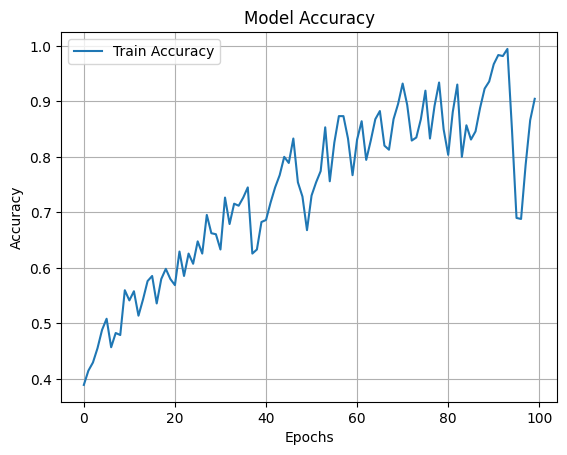

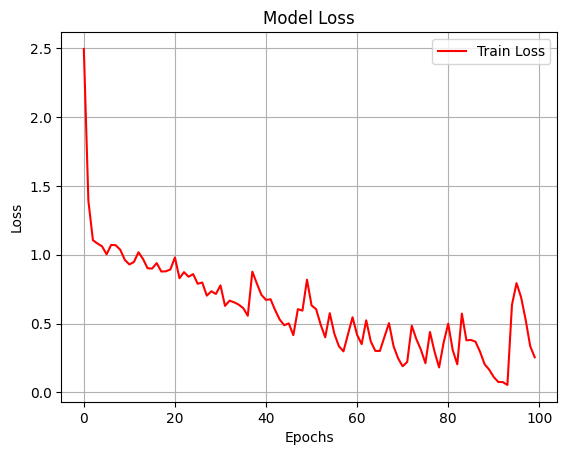

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Model Architecture
- **Feature Extraction**: A Bidirectional Residual Network (BiResNet) was used to extract high-level representations from the spectrograms
- **Sequence Modeling**: A Transformer Encoder was applied to model temporal patterns in the extracted features
- **Classification**: A final dense layer outputs the class label (0, 1, or 2)


In [ ]:
# transformers usage

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

# Treat MFCCs as sequences of shape (13, 1)
X_train_seq = X_train_audio.reshape(-1, 13, 1)
X_test_seq = X_test_audio.reshape(-1, 13, 1)

# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
num_classes = len(np.unique(y_train_encoded))

# Transformer Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Multi-head attention
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)

    # Feed-forward network
    x_ff = Dense(ff_dim, activation="relu")(x)
    x_ff = Dense(inputs.shape[-1])(x_ff)
    x = Dropout(dropout)(x_ff)
    x = LayerNormalization(epsilon=1e-6)(x + x_ff)

    return x

# Model definition
def build_transformer_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = transformer_encoder(inputs, head_size=64, num_heads=2, ff_dim=64)
    x = transformer_encoder(x, head_size=64, num_heads=2, ff_dim=64)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

# Build and compile
model = build_transformer_model(input_shape=(13, 1), num_classes=num_classes)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

# Train
history = model.fit(X_train_seq, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)

# Predict
predictions = model.predict(X_test_seq)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 13, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 13, 1)          │            897 │ input_layer_1[0][0],   │
│ (MultiHeadAttention)      │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 13, 1)          │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_6 (Add)               │ (None, 13, 1)          │              0 │ dropout_1[0][0],       │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 13, 1)          │              2 │ add_6[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 13, 64)         │            128 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 13, 1)          │             65 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 13, 1)          │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_7 (Add)               │ (None, 13, 1)          │              0 │ dropout_2[0][0],       │
│                           │                        │                │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 13, 1)          │              2 │ add_7[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 13, 1)          │            897 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 13, 1)          │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 13, 1)          │              0 │ dropout_4[0][0],       │
│                           │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 13, 1)          │              2 │ add_8[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 13, 64)         │            128 │ layer_normalization_2… │
├──────────────────────

 Total params: 2,511 (9.81 KB)

 Trainable params: 2,511 (9.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.4382 - loss: 1.0976 - val_accuracy: 0.1927 - val_loss: 1.1024
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5063 - loss: 1.0934 - val_accuracy: 0.1927 - val_loss: 1.1060
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4856 - loss: 1.0909 - val_accuracy: 0.1927 - val_loss: 1.1090
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5295 - loss: 1.0850 - val_accuracy: 0.1927 - val_loss: 1.1126
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4916 - loss: 1.0846 - val_accuracy: 0.1927 - val_loss: 1.1157
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5389 - loss: 1.0767 - val_accuracy: 0.1927 - val_loss: 1.1190
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4731 - loss: 1.0817 - val_accuracy: 0.1927 - val_loss: 1.1220
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5065 - loss: 1.0747 - val_accuracy: 0.1927 - 

In [ ]:
# transformers with biresnet

from tensorflow.keras.layers import (
    MultiHeadAttention, LayerNormalization, Dropout,
    GlobalAveragePooling1D, Reshape
)

# Transformer block
def transformer_block(x, head_size=64, num_heads=2, ff_dim=128, dropout=0.1):
    # Self-attention
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(x, x)
    attn_output = Dropout(dropout)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(x + attn_output)

    # Feed-forward
    ffn = Dense(ff_dim, activation="relu")(out1)
    ffn = Dense(x.shape[-1])(ffn)
    ffn = Dropout(dropout)(ffn)
    return LayerNormalization(epsilon=1e-6)(out1 + ffn)

# BiResNet + Transformer hybrid model
def BiResNet_Transformer(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Branch 1
    x1 = Conv2D(64, (3,1), padding="same")(inputs)
    x1 = BatchNormalization()(x1)
    x1 = Activation("relu")(x1)
    x1 = identity_block(x1, (64, 64))
    x1 = convolutional_block(x1, (128, 128))
    x1 = identity_block(x1, (128, 128))

    # Branch 2
    x2 = Conv2D(64, (5,1), padding="same")(inputs)
    x2 = BatchNormalization()(x2)
    x2 = Activation("relu")(x2)
    x2 = identity_block(x2, (64, 64))
    x2 = convolutional_block(x2, (128, 128))
    x2 = identity_block(x2, (128, 128))

    # Concatenate both branches
    x = Concatenate()([x1, x2])

    # Flatten CNN features to apply Transformer
    b, h, w, c = x.shape
    x = Reshape((h * w, c))(x)  # Sequence format: (batch, time, features)

    # Add Transformer block(s)
    x = transformer_block(x, head_size=64, num_heads=2, ff_dim=128, dropout=0.1)

    # Classification head
    x = GlobalAveragePooling1D()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

# Build and compile
model = BiResNet_Transformer(input_shape, num_classes)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

# Train
history = model.fit(X_train_audio_reshaped, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)

# Predict
predictions = model.predict(X_test_audio_reshaped)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 13, 1, 1)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 13, 1, 64)      │            256 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 13, 1, 64)      │            384 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 13, 1, 64)      │            256 │ conv2d_16[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_24    │ (None, 13, 1, 64)      │            256 │ conv2d_24[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_14             │ (None, 13, 1, 64)      │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_21             │ (None, 13, 1, 64)      │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 13, 1, 64)      │         12,352 │ activation_14[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 13, 1, 64)      │         12,352 │ activation_21[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 13, 1, 64)      │            256 │ conv2d_17[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_25    │ (None, 13, 1, 64)      │            256 │ conv2d_25[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_15             │ (None, 13, 1, 64)      │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_22             │ (None, 13, 1, 64)      │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 13, 1, 64)      │         12,352 │ activation_15[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 13, 1, 64)      │         12,352 │ activation_22[0][0]    │
├──────────────────────

 Total params: 650,371 (2.48 MB)

 Trainable params: 647,043 (2.47 MB)

 Non-trainable params: 3,328 (13.00 KB)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.4236 - loss: 1.2385 - val_accuracy: 0.1743 - val_loss: 1.5577
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5402 - loss: 0.9876 - val_accuracy: 0.1927 - val_loss: 1.4938
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4860 - loss: 0.9983 - val_accuracy: 0.1927 - val_loss: 1.4352
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5679 - loss: 0.8784 - val_accuracy: 0.2202 - val_loss: 1.3864
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5325 - loss: 0.9124 - val_accuracy: 0.1927 - val_loss: 1.6477
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5284 - loss: 0.9064 - val_accuracy: 0.1927 - val_loss: 1.6678
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5838 - loss: 0.8964 - val_accuracy: 0.1835 - val_loss: 1.5741
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.6162 - loss: 0.8552 - val_accuracy: 0.1835 -

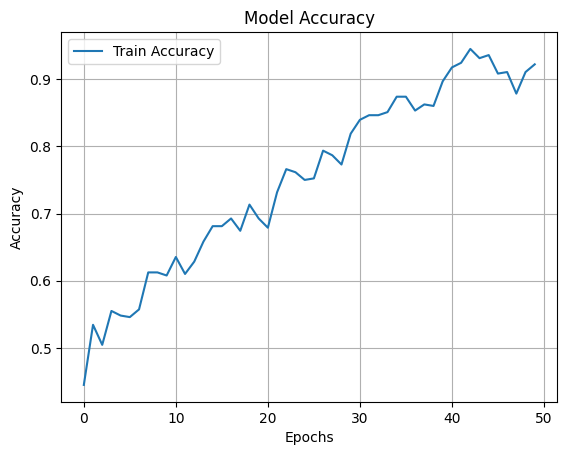

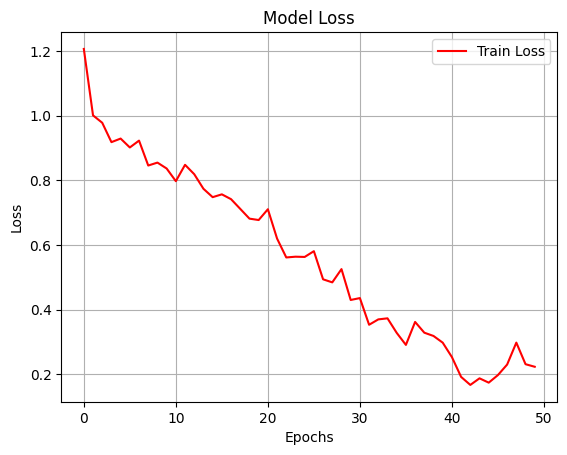

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# This project is intended for academic and experimental use only. It is not a certified medical diagnostic tool and should not be used for clinical purposes.